<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/ROC-AUC/ROC_and_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

## Import the data

In [3]:
URL = 'https://raw.githubusercontent.com/Ajay-user/DataScience/master/ROC-AUC/heart-disease.csv'
df = pd.read_csv(URL)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# checking dtype of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Feature & Target

In [6]:
X = df.drop(columns='target')
y = df.target

print('Shape of dataset', df.shape)
print('Shape of Feature', X.shape)
print('Shape of Target', y.shape)

Shape of dataset (303, 14)
Shape of Feature (303, 13)
Shape of Target (303,)


## Train and Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape oF X_train',X_train.shape) 
print('Shape oF y_train',y_train.shape)
print('Shape oF X_test',X_test.shape) 
print('Shape oF y_test',y_test.shape)  

Shape oF X_train (242, 13)
Shape oF y_train (242,)
Shape oF X_test (61, 13)
Shape oF y_test (61,)


##  Feature Scaling

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



In [11]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Random Forest

In [14]:
#  Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8524590163934426

In [25]:
# cross validation
forest_cv = cross_val_score(forest, X, y)
print('cross validation scores',list(forest_cv))
print('cross validation average scores',forest_cv.mean())

cross validation scores [0.8360655737704918, 0.8688524590163934, 0.8032786885245902, 0.8166666666666667, 0.7833333333333333]
cross validation average scores 0.821639344262295


## Logistic Regression

In [28]:
# raw data (NOT SCALED)
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8852459016393442

In [30]:
# cross validation using raw data (NOT SCALED)
log_reg_cv = cross_val_score(log_reg, X, y)
print('cross validation scores',list(log_reg_cv))
print('cross validation average scores',log_reg_cv.mean())

cross validation scores [0.8032786885245902, 0.8688524590163934, 0.8524590163934426, 0.8666666666666667, 0.75]
cross validation average scores 0.8282513661202187


In [35]:
# scaled data (SCALED USING STANDARD SCALER)
log_reg_scaled = LogisticRegression(max_iter=3000)
log_reg_scaled.fit(scaled_X_train, y_train)
log_reg_scaled.score(scaled_X_test, y_test)

0.8524590163934426

In [36]:
# cross validation using scaled data (SCALED USING STANDARD SCALER)
log_reg_scaled_cv = cross_val_score(log_reg_scaled, X, y)
print('cross validation scores',list(log_reg_scaled_cv))
print('cross validation average scores',log_reg_scaled_cv.mean())

cross validation scores [0.8032786885245902, 0.8688524590163934, 0.8524590163934426, 0.8666666666666667, 0.75]
cross validation average scores 0.8282513661202187


## Cross validation results

In [40]:
cv_results = pd.DataFrame(data={'Random Forest':forest_cv.mean(),
                                'Logistic Regression':log_reg_cv.mean()}, index=['score'])
cv_results.head()

,Random Forest,Logistic Regression
score,0.821639,0.828251


## Which model to choose

**Confusion matrix**<br>
We can plot the confusion matrix and based on it make a choice for the model
but confusion matrix can get complex if there are more classes (in this case there is only 2 classes which are  positive and negative)

Size of confusion matrix is determined by the number of things we want to predict. There are other sophisticated methods we can use like
* **Sensitivity**
* **Specificity**
* **ROC**
* **AUC**

### Confusion matrix 


In [52]:
forest_preds = forest.predict(X_test)

print('Confusion matrix for RandomForest')
print(confusion_matrix(y_test, forest_preds))

Confusion matrix for RandomForest
[[25  4]
 [ 5 27]]


In [51]:
log_reg_preds = log_reg.predict(X_test)

print('Confusion matrix for Logistic Regression')
print(confusion_matrix(y_test, log_reg_preds))

Confusion matrix for Logistic Regression
[[25  4]
 [ 3 29]]


### Sensitivity and Specificity
**Note that in binary classification, recall of the positive class is also known as “sensitivity”**; 

**recall of the negative class is “specificity”**.

In [54]:
print('RandomForestClassifier')
print(classification_report(y_test, forest_preds))

print('LogisticRegression')
print(classification_report(y_test, log_reg_preds))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [70]:
[[tn, fp], [fn, tp] ] = confusion_matrix(y_test, forest_preds)
print('Random Forest')
print('Sensitivity : ',tp/(tp+fn))
print('Sensitivity : ',tn/(tn+fp))

Random Forest
Sensitivity :  0.84375
Sensitivity :  0.8620689655172413


In [69]:
[[tn, fp], [fn, tp] ] = confusion_matrix(y_test, log_reg_preds)
print('Logistic Regression')
print('Sensitivity : ',tp/(tp+fn))
print('Sensitivity : ',tn/(tn+fp))

Logistic Regression
Sensitivity :  0.90625
Sensitivity :  0.8620689655172413


### ROC curve

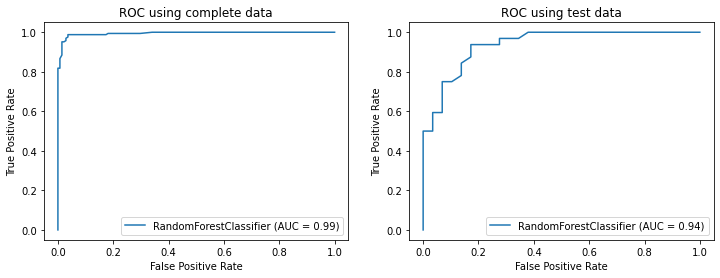

In [120]:
# Random forest model

# we are using complete data
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_roc_curve(forest, X, y, ax=ax[0]);
ax[0].set(title='ROC using complete data')
# we are using test-data
plot_roc_curve(forest, X_test, y_test, ax=ax[1]);
ax[1].set(title='ROC using test data')
plt.show()

In [88]:
# probability estimates of the positive class
forest_probs = forest.predict_proba(X_test)
forest_probs_positive = forest_probs[:,1]

fpr, tpr , threshold = roc_curve(y_test, forest_probs_positive)
forest_roc_params = pd.DataFrame(data={'False positive rate':fpr,
                                'True positive rate':tpr,
                                'Threshold':threshold})
forest_roc_params.head()

,False positive rate,True positive rate,Threshold
0,0.0,0.00000,2.00
1,0.0,0.03125,1.00
2,0.0,0.09375,0.99
3,0.0,0.34375,0.82
4,0.0,0.40625,0.81


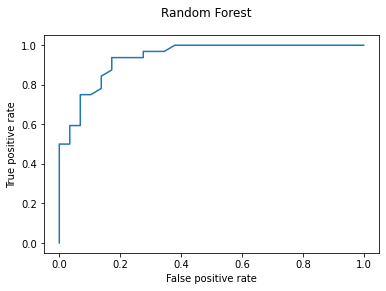

In [97]:
plt.plot(forest_roc_params['False positive rate'],forest_roc_params['True positive rate'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.suptitle('Random Forest')
plt.show()

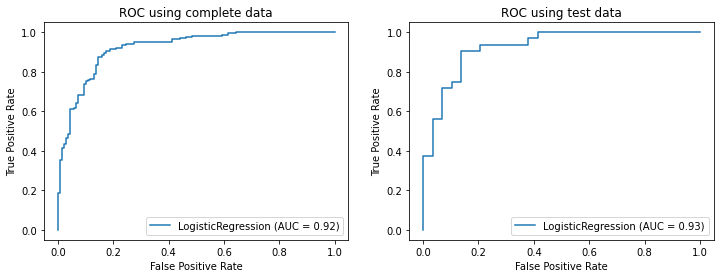

In [121]:
# Logistic regression 
# we are using complete data
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_roc_curve(log_reg, X, y, ax=ax[0]);
ax[0].set(title='ROC using complete data')
# we are using test-data
plot_roc_curve(log_reg, X_test, y_test, ax=ax[1]);
ax[1].set(title='ROC using test data')
plt.show()

In [89]:
# probability estimates of the positive class
log_reg_probs = log_reg.predict_proba(X_test)
log_reg_probs_positive = log_reg_probs[:,1]

fpr, tpr , threshold = roc_curve(y_test, log_reg_probs_positive)
log_reg_roc_params = pd.DataFrame(data={'False positive rate':fpr,
                                'True positive rate':tpr,
                                'Threshold':threshold})
log_reg_roc_params.head()

,False positive rate,True positive rate,Threshold
0,0.000000,0.00000,1.988069
1,0.000000,0.03125,0.988069
2,0.000000,0.37500,0.891468
3,0.034483,0.37500,0.887010
4,0.034483,0.56250,0.806892


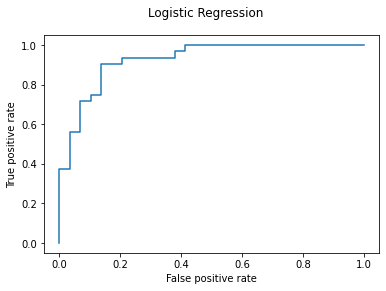

In [95]:
plt.plot(log_reg_roc_params['False positive rate'],log_reg_roc_params['True positive rate'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.suptitle('Logistic Regression')
plt.show()

Comparing ROC curve of Random Forest and Logistic Regression model

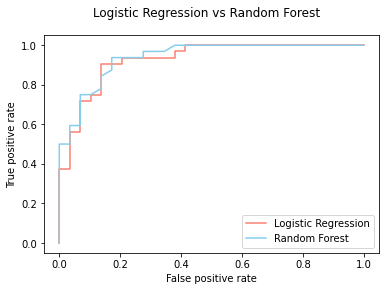

In [99]:
plt.plot(log_reg_roc_params['False positive rate'],log_reg_roc_params['True positive rate'], color='salmon')
plt.plot(forest_roc_params['False positive rate'],forest_roc_params['True positive rate'], color='skyblue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['Logistic Regression','Random Forest'])
plt.suptitle('Logistic Regression vs Random Forest')
plt.show()

### AUC

In [79]:
print('AUC score Random Forest',roc_auc_score(y_test, forest_preds))
print('AUC score Logistic Regression',roc_auc_score(y_test, log_reg_preds))

AUC score Random Forest 0.8529094827586207
AUC score Logistic Regression 0.8841594827586207
